## Simulate and solve the dining philosophers problem

The dining philosophers problem was first introduced by Edgar Dijkstra, a leading pioneer in concurrent programming, in 1965. This problem was first demonstrated using different technical terms (resource contention in computer systems) and was later rephrased by Tony Hoare, a British computer scientist and the inventor of the quicksort sorting algorithm. The problem statement is as follows.

Five philosophers sit around a table, and each has a bowl of food in front of them. Placed between these five bowls of food are five forks, so each philosopher has one fork to their left and one fork to their right. This setup is shown in the following diagram:

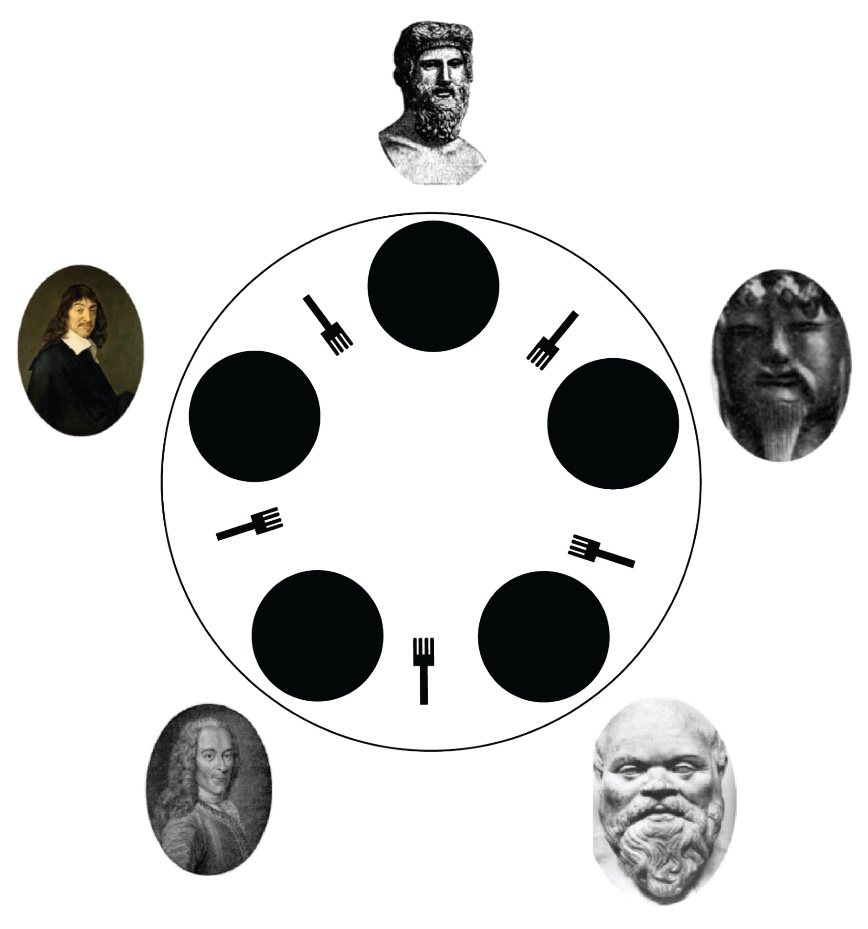

Each silent philosopher is to alternate between thinking and eating. Each is required to have both of the forks around them to be able to pick up the food from their bowl, and no fork can be shared between two or more different philosophers. When a philosopher finishes eating a specific amount of food, they are to place both of the forks back in their respective, original locations. At this point, the philosophers around that philosopher will be able to use those forks.

Since the philosophers are silent and cannot communicate with each other, they have no way to let each other know they need the forks to eat. In other words, the only way for a philosopher to eat is to have both of the forks already available to them. For this problem, a set of instructions must be designed for the philosophers to efficiently switch between eating and thinking so that each philosopher is provided with enough food.

Now, a potential approach to this problem would be the following set of instructions:

1. A philosopher must think until the fork on their left becomes available. When that happens, the philosopher is to pick it up.
2. A philosopher must think until the fork on their right becomes available. When that happens, the philosopher is to pick it up.
3. If a philosopher is holding two forks, they will eat a specific amount of food from the bowl in front of them, and then the following will apply:
    - Afterward, the philosopher has to put the right fork down in its original place.
    - Afterward, the philosopher has to put the left fork down in its original place.
4. The process repeats from the first step.

The following program defines the philosopher class and simulate the dining philosophers problem in Python.

In [ ]:
import threading
# The philosopher thread
def philosopher(left, right):
    while True:
        with left:
             with right:
                 print(f'Philosopher at \
                  {threading.currentThread()} is eating.')

                  
# The chopsticks
N_FORKS = 5
forks = [threading.Lock() for n in range(N_FORKS)]
# Create all of the philosophers
phils = [ \
  threading.Thread(target=philosopher,args=(forks[n], forks \
    [(n + 1) % N_FORKS])) for n in range(N_FORKS)]
# Run all of the philosophers
for p in phils:
    p.start()

Modify the philosopher class and extend the __acquire()__ function in Python to resolve the deadlock situation of previous simulation of the dinning philosopher problem. You may use the built-in __id()__ function in Python to sort lock objects in Python.

In [ ]:
import threading
# acquire class
class acquire(object):
    def __init__(self, *locks):
        self.locks = sorted(locks, key=lambda x: id(x))
    def __enter__(self):
        for lock in self.locks:
            lock.acquire()
    def __exit__(self, ty, val, tb):
        for lock in reversed(self.locks):
            lock.release()
        return False

# The philosopher thread
def philosopher(left, right):
    while True:
        with acquire(left,right):
             print(f'Philosopher at \
               {threading.currentThread()} is eating.')

# The chopsticks
N_FORKS = 5
forks = [threading.Lock() for n in range(N_FORKS)]
# Create all of the philosophers
phils = [ \
  threading.Thread(target=philosopher,args=(forks[n], forks \
    [(n + 1) % N_FORKS])) for n in range(N_FORKS)]
# Run all of the philosophers
for p in phils:
    p.start()
